# Welcome to my BoardGameGeek EDA

In this exploration, I aim to assist a future bar owner, Mr. Barman, in making critical decisions about his bar's board games inventory. This includes selecting games to purchase based on his requests and planned events to attract both board game enthusiasts and amateurs. The world of board games extends beyond the commonly known games like Monopoly, card games, chess, etc., and I hope to shed light on this less explored domain.

Through this data-driven analysis, I will investigate past and future tendencies in board games. My goal is to provide Mr. Barman with insights and predictions that may benefit his bar in the long term, ensuring its longevity and success.

This research EDA also serves a personal interest. For me, board games are a medium through which I can connect, engage in social interactions, and strengthen bonds with those around me.

## Key Points

- **Game Acquisition:** When advising Mr. Barman on which games to acquire, I will focus on games released since the 90s, as they are generally easier to obtain.
- **Research Scope:** For my personal research, I will examine the entire DataFrame to gain a comprehensive understanding of board game trends.

Join me as we delve into the fascinating world of board games and discover valuable insights that could help shape the future of Mr. Barman's bar.

In [2]:
#Importing neccessary packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#Functions to be used
#Label each weight
def map_rating(rating):
    if rating >= 0 and rating <=1:
        return '0-1 Unrated'    
    elif rating > 1 and rating <= 2:
        return '1-2 Easy'
    elif rating > 2 and rating <= 3:
        return '2-3 Intermediate'
    elif rating > 3 and rating <= 4:
        return '3-4 Challenging'
    elif rating > 4 and rating <= 5:
        return '4-5 Hard'
    else:
        return 'Invalid'
    

In [3]:
# Load and preprocess the dataset
bgg_raw = pd.read_csv("/kaggle/input/bgg-eda/games_detailed_info.csv", index_col=0, low_memory=False)
selected_columns = [
    'Board Game Rank', 'primary', 'description', 'yearpublished', 'minplayers',
    'maxplayers', 'minage', 'boardgamedesigner', 'average', 'averageweight',
    'boardgamecategory', 'boardgamemechanic', 'usersrated', 'Family Game Rank'
]
bgg = bgg_raw[selected_columns]

# Convert ranks to numeric and handle missing values
bgg.loc[:, 'Board Game Rank'] = pd.to_numeric(bgg['Board Game Rank'], errors='coerce')
bgg.loc[:, 'Family Game Rank'] = pd.to_numeric(bgg['Family Game Rank'], errors='coerce')

# Sort the dataframe by Board Game Rank
bgg = bgg.sort_values(by='Board Game Rank')

# Map the average weight to rating labels
bgg['Rating_Label'] = bgg['averageweight'].map(map_rating)

# Constants
USERSRATED_TOP = bgg['usersrated'].quantile(0.90)
WEIGHT_MEDIAN = bgg['averageweight'].median()
AVG_MEDIAN = bgg['average'].median()

In [4]:
# Displaying the top 5 games
bgg.head()

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
26,1.0,Gloomhaven,Gloomhaven is a game of Euro-inspired tactica...,2017,1,4,14,['Isaac Childres'],8.74356,3.8699,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign...",47853,NaN,3-4 Challenging
28,2.0,Pandemic Legacy: Season 1,Pandemic Legacy is a co-operative campaign gam...,2015,2,4,13,"['Rob Daviau', 'Matt Leacock']",8.59350,2.8310,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...",45064,NaN,2-3 Intermediate
98,3.0,Brass: Birmingham,Brass: Birmingham is an economic strategy game...,2018,2,4,14,"['Gavan Brown', 'Matt Tolman', 'Martin Wallace']",8.66343,3.8988,"['Economic', 'Industry / Manufacturing', 'Post...","['Hand Management', 'Income', 'Loans', 'Market...",25515,NaN,3-4 Challenging
7,4.0,Terraforming Mars,"In the 2400s, mankind begins to terraform the ...",2016,1,5,12,['Jacob Fryxelius'],8.41702,3.2434,"['Economic', 'Environmental', 'Industry / Manu...","['Drafting', 'End Game Bonuses', 'Hand Managem...",74269,NaN,3-4 Challenging
199,5.0,Twilight Imperium: Fourth Edition,Twilight Imperium (Fourth Edition) is a game o...,2017,3,6,14,"['Dane Beltrami', 'Corey Konieczka', 'Christia...",8.67603,4.2610,"['Civilization', 'Economic', 'Exploration', 'N...","['Action Drafting', 'Area Majority / Influence...",16036,NaN,4-5 Hard


### Ensuring Dataframe Integrity for Analysis

Before diving into the analysis, it's crucial to verify the integrity, usefulness, and reliability of the DataFrame. This can be achieved through three methods:

1. **Describe**: Provides a statistical summary including minimum, maximum, percentiles, mean, etc.
2. **Info**: Displays data types and counts of non-NaN cells for each column.
3. **Isna**: Counts and presents the null values per column for easier review.

In [5]:
#subsetting the DataFrame to numerical columns only. 
num_cols=['yearpublished','minplayers', 'maxplayers','minage','average','averageweight','usersrated','Board Game Rank','Family Game Rank']
bgg[num_cols].describe()

,yearpublished,minplayers,maxplayers,minage,average,averageweight,usersrated,Family Game Rank
count,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,2327.000000
mean,1986.094910,2.007027,5.709491,9.611391,6.417127,1.978830,875.000693,1164.109153
std,210.042496,0.688957,15.102385,3.640562,0.929178,0.848984,3697.681390,672.059871
min,-3500.000000,0.000000,0.000000,0.000000,1.041330,0.000000,29.000000,1.000000
25%,2001.000000,2.000000,4.000000,8.000000,5.832710,1.333300,57.000000,582.500000
50%,2011.000000,2.000000,4.000000,10.000000,6.446360,1.952400,124.000000,1164.000000
75%,2017.000000,2.000000,6.000000,12.000000,7.039515,2.520000,397.000000,1745.500000
max,2023.000000,10.000000,999.000000,25.000000,9.568290,5.000000,109006.000000,2328.000000


I can see that some cells are **abnormal** and might insinuate **incomplete** or **defected DataFrame** that might require further investigation:
1. **Min year**: `-3500` (too old of a game?)
2. **Max players**: `999` (a thousand players game is too much)
3. **Min age**: `25` (why isn't it `18`?)

In [6]:
bgg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21631 entries, 26 to 21625
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Board Game Rank    21626 non-null  object 
 1   primary            21631 non-null  object 
 2   description        21630 non-null  object 
 3   yearpublished      21631 non-null  int64  
 4   minplayers         21631 non-null  int64  
 5   maxplayers         21631 non-null  int64  
 6   minage             21631 non-null  int64  
 7   boardgamedesigner  21035 non-null  object 
 8   average            21631 non-null  float64
 9   averageweight      21631 non-null  float64
 10  boardgamecategory  21348 non-null  object 
 11  boardgamemechanic  20041 non-null  object 
 12  usersrated         21631 non-null  int64  
 13  Family Game Rank   2327 non-null   float64
 14  Rating_Label       21631 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 2.6+ MB


The types of each column fit its title.

In [7]:
bgg.isna().sum()

Board Game Rank          5
primary                  0
description              1
yearpublished            0
minplayers               0
maxplayers               0
minage                   0
boardgamedesigner      596
average                  0
averageweight            0
boardgamecategory      283
boardgamemechanic     1590
usersrated               0
Family Game Rank     19304
Rating_Label             0
dtype: int64

When a mechanic is important, I will drop the NA mechanic; otherwise, the game will be used. The `Family Game Rank` column ranks only the family-friendly games, 2327, while all the rest is NA.

### Checking for Duplicates in the DataFrame

In [8]:
dupe=bgg.duplicated().sum()
print(f"Number of duplicated rows:{dupe}") 

Number of duplicated rows:0


Furthermore, it seems there are **no duplicated games** as well.

### Investigating Abnormalities Found in the Data

First, I will explore games that are listed as being published **before the common era (B.C.E.)**.

In [9]:
bce_games=len(bgg[(bgg['yearpublished']<0)].sort_values(by='yearpublished',ascending=False)) 
print(f"There are {bce_games} games in the DataFrame dated before common era.")  
bgg[bgg["yearpublished"]<0]

There are 11 games in the DataFrame dated before common era.


,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
208,186.0,Go,"By all appearances, it's just two players taki...",-2200,2,2,8,['(Uncredited)'],7.63588,3.9422,['Abstract Strategy'],"['Enclosure', 'Point to Point Movement', 'Squa...",15516,NaN,3-4 Challenging
296,1332.0,Backgammon,Backgammon is a classic abstract strategy game...,-3000,2,2,8,['(Uncredited)'],6.54443,2.0182,"['Abstract Strategy', 'Dice']","['Advantage Token', 'Betting and Bluffing', 'D...",12303,NaN,2-3 Intermediate
4088,7878.0,The Royal Game of Ur,The game has been published under different na...,-2600,2,2,10,['(Uncredited)'],5.98520,1.3000,"['Abstract Strategy', 'Dice']","['Dice Rolling', 'Race', 'Roll / Spin and Move...",608,NaN,1-2 Easy
3622,8755.0,Senet,Senet is an ancient Egyptian board game simila...,-3500,2,2,6,['(Uncredited)'],5.81282,1.4697,"['Abstract Strategy', 'Religious']","['Dice Rolling', 'Roll / Spin and Move']",718,NaN,1-2 Easy
16493,16008.0,Petteia,"Roughly translated as 'Robbers', this abstract...",-100,2,2,5,['Moshe Callen'],6.01091,2.1667,['Abstract Strategy'],"['Action Queue', 'Area Majority / Influence']",55,NaN,2-3 Intermediate
21622,17219.0,Knucklebones,Background:&#10;&#10;This game is a forerunner...,-3000,2,2,6,['(Uncredited)'],5.78333,0.0000,"['Action / Dexterity', 'Ancient', 'Dice']","['Betting and Bluffing', 'Dice Rolling']",30,NaN,0-1 Unrated
15506,21057.0,Three Men's Morris,This ancient game is probably a direct ancesto...,-1400,2,2,5,['(Uncredited)'],4.38403,1.2500,['Abstract Strategy'],"['Pattern Building', 'Point to Point Movement']",62,NaN,1-2 Easy
2238,21516.0,Nine Men's Morris,Nine Men's Morris is a very old game that has ...,-1400,2,2,6,['(Uncredited)'],5.35425,1.8279,['Abstract Strategy'],"['Pattern Building', 'Point to Point Movement']",1408,NaN,1-2 Easy
4722,21708.0,Marbles,"Marbles was played by ancient Egyptians, who m...",-3000,1,0,4,['(Uncredited)'],4.68978,1.1000,"['Action / Dexterity', ""Children's Game"", 'Gam...",['Flicking'],490,NaN,1-2 Easy
880,21831.0,Chutes and Ladders,Traditional game from ancient India was brough...,-200,2,6,3,['(Uncredited)'],2.86623,1.0194,"['Animals', ""Children's Game"", 'Dice', 'Movies...","['Dice Rolling', 'Grid Movement', 'Race', 'Rol...",4038,NaN,1-2 Easy


It looks reasonable that some games have very low `yearpublished` values since they are before the common era.

### Second Abnormality: Games with Unreasonable Number of Players

In [10]:
bgg[bgg['maxplayers']>10].sort_values('maxplayers',ascending=False)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
8698,7690.0,Start Player: A Kinda Collectible Card Game,Start Player: A Kinda Collectible Card Game is...,2006,2,999,6,['Ted Alspach'],6.51129,1.0000,"['Card Game', 'Collectible Components', 'Comic...",NaN,182,1626.0,0-1 Unrated
13008,9098.0,"I Don't Know, What Do You Want to Play?",Unique game whose components consist of a card...,2007,2,999,8,['Tom Kiehl'],6.80690,1.0588,['Card Game'],['Voting'],87,NaN,1-2 Easy
6893,10596.0,Scrimish Card Game,Scrimish is a fast moving card game that pits ...,2015,2,999,8,['Danny Zondervan'],5.92791,1.1250,['Card Game'],['Memory'],268,NaN,1-2 Easy
15702,20176.0,The Hammer of Thor: The Game of Norse Mythology,Probably the most comprehensive mythology game...,1980,1,362,12,['Joe Angiolillo'],5.03689,3.5000,"['Card Game', 'Fantasy', 'Fighting', 'Mythology']","['Dice Rolling', 'Events', 'Paper-and-Pencil',...",61,NaN,3-4 Challenging
4177,4966.0,Linkee!,Linkee is a trivia party game that can be play...,2012,2,200,14,NaN,6.34227,1.1250,"['Party Game', 'Trivia']",NaN,593,NaN,1-2 Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16160,10778.0,Feed the Kraken,Feed the Kraken is a hidden role deduction gam...,2022,5,11,12,"['Dr. Hans Joachim Höh', 'Maikel Cheney', 'Tob...",8.45365,1.8000,"['Bluffing', 'Card Game', 'Deduction', 'Miniat...","['Acting', 'Grid Movement', 'Hidden Roles', 'R...",57,NaN,1-2 Easy
10722,21521.0,Escape The Night: The Board Game,Based on the first season of the hit reality c...,2020,1,11,0,['Joey Graceffa'],4.98492,1.0000,"['Adventure', 'Fantasy', 'Horror', 'Movies / T...","['Alliances', 'Dice Rolling', 'Grid Movement',...",126,NaN,0-1 Unrated
11132,20112.0,"Si, Oscuro Padrino!","After the huge success of Aye, Dark Overlord! ...",2007,4,11,12,['Gianluca Santopietro'],5.34280,1.0000,"['Card Game', 'Economic', 'Humor', 'Mafia', 'M...","['Acting', 'Cooperative Game', 'Role Playing',...",118,NaN,0-1 Unrated
17293,15532.0,Blades of Legend,Blades of Legend is a party style secret roles...,2012,6,11,12,"['D. Brad Talton, Jr.']",6.14286,2.5000,"['Deduction', 'Fantasy', 'Mythology', 'Party G...","['Team-Based Game', 'Variable Player Powers']",49,NaN,2-3 Intermediate


After performing manual research on the top 3 games: **"Scirmish"**, **"I Don't Know, What Do You Want to Play?"**, and **"Start Player: A Kinda Collectible Card Game"**, I've come to the conclusion that games listed with a max player count of `999` are card games without a number of players restriction and were noted as `999`.

Creating a plot illustrating that the majority of games are designed for 2-4 players, with a noticeable decline in the number of games as the player count exceeds 12. Interestingly, there is a virtual peak at 999 players, indicating games without a fixed player limit.

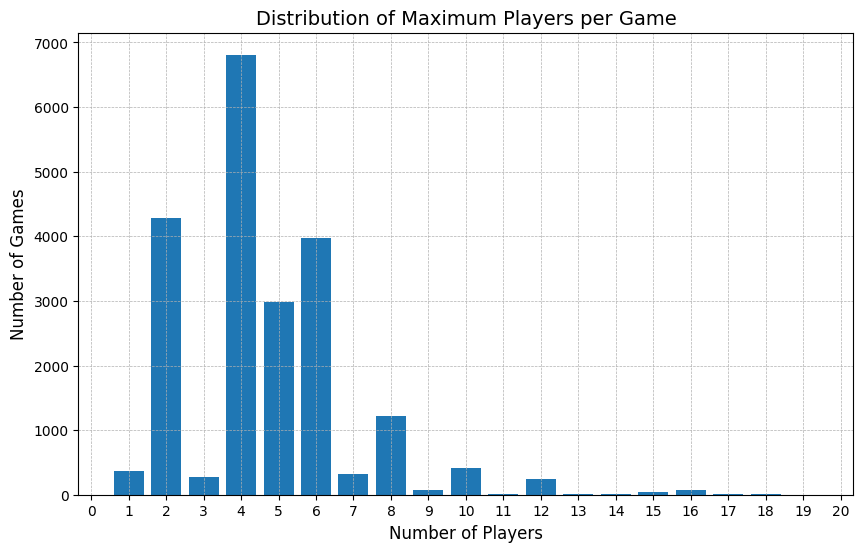

In [11]:
# Setting up the figure size and style for better visualization
plt.figure(figsize=(10, 6))

# Filtering the dataset for games with less than 20 max players
maxplayers_hist = bgg[bgg['maxplayers'] < 20]

# Plotting the histogram with specific adjustments for clarity and aesthetics
maxplayers_hist['maxplayers'].plot(kind='hist', 
                                   bins=range(1, 21), 
                                   align='left', 
                                   rwidth=0.8, )

# Setting the labels and title for the plot
plt.xlabel('Number of Players', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.title('Distribution of Maximum Players per Game', fontsize=14)

# Adjusting the x-axis to have a tick for each possible number of players
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

# Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Displaying the plot
plt.show()

I can see that most games are up to **12 players**, above that there are barely any games with that much max players.

The last abnormality found in the `describe` method was a high minimum age of **25**. So, I would look for games with a minimum age above **18**.

In [12]:
# Filtering the dataset for games with a minimum age requirement above 18
games_above_18 = bgg[bgg['minage'] > 18]

# Displaying the filtered DataFrame
games_above_18

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
7814,6726.0,Swinging Jivecat Voodoo Lounge,You and your fellow voodoo spirits have travel...,2016,2,5,21,['Seth Roback'],6.53356,2.6250,"['Mature / Adult', 'Number', 'Territory Buildi...","['Area Majority / Influence', 'Hand Management...",219,NaN,2-3 Intermediate
5617,7175.0,DrunkQuest,DrunkQuest is a fantasy-based card game with f...,2013,3,6,21,"['Athena Cagle', 'Jasn Painter']",6.26141,1.9412,"['Card Game', 'Fantasy', 'Humor', 'Party Game']","['Campaign / Battle Card Driven', 'Card Drafti...",377,NaN,1-2 Easy
13366,7623.0,Das Wasser des Lebens,Das Wasser des Lebens (&quot;The Water of Life...,1997,3,4,21,['Klaus Teuber'],7.61560,2.6667,['Civilization'],"['Modular Board', 'Trading']",83,NaN,2-3 Intermediate
8412,7640.0,Unstable Unicorns: NSFW Base Game,Warning: NSFW!!! (Unless your boss appreciates...,2019,2,8,21,['Ramy Badie'],6.86309,1.7500,"['Card Game', 'Humor', 'Mature / Adult', 'Part...","['Hand Management', 'Set Collection', 'Take Th...",194,NaN,1-2 Easy
8831,9221.0,Drinking Fluxx,"Drinking Fluxx is a version of Fluxx, the card...",2017,2,6,21,['Andrew Looney'],6.32365,1.0000,['Card Game'],"['Hand Management', 'Set Collection']",177,NaN,0-1 Unrated
16859,9477.0,1836,Ohio had over 30 independent early railroads r...,2019,3,5,21,['John Bohrer'],7.66538,4.0000,"['Economic', 'Trains', 'Transportation']","['Auction/Bidding', 'Stock Holding', 'Tile Pla...",52,NaN,3-4 Challenging
13328,13625.0,Drinking Quest: Journey into Draught,Description from the publisher:&#10;&#10;Journ...,2016,2,4,21,['Jason Anarchy'],6.28759,1.2500,['Card Game'],['Role Playing'],83,NaN,1-2 Easy
13895,13653.0,Drinking Quest,Like a typical Role Playing Game you have a ch...,2011,2,4,21,['Jason Anarchy'],6.17455,1.3333,"['Card Game', 'Mature / Adult']","['Dice Rolling', 'Role Playing']",77,NaN,1-2 Easy
21230,14662.0,Whiskey Business!,"Whiskey Business! is a fun, strategic dice gam...",2018,2,6,21,NaN,6.71613,1.5000,"['Dice', 'Industry / Manufacturing', 'Party Ga...","['Dice Rolling', 'Push Your Luck']",31,NaN,1-2 Easy
15631,15886.0,Brew Dice,Description from the publisher:&#10;&#10;Brew ...,2017,2,4,21,['Andy Geremia'],6.14426,1.0000,"['Dice', 'Party Game']","['Dice Rolling', 'Pattern Building']",61,NaN,0-1 Unrated


I could see that while some drinking games restrict players from drinking below 21 years old (drinking age of the USA), only one game has a 25 years old restriction. After a manual search, I can see that on the website, the game was updated to 16+, which is reasonable.

I will perform some data cleaning:
- It seems that some descriptions have some HTML characters in them,
- There are some unwanted prerequisites I would like to remove, cleaning the `description` column making it easier to understand the game description.

In [13]:
# Cleaning HTML entities and specific phrases from the 'description' column
html_entities = {
    '&quot;': '',
    '&#10;': '',
    '&nbsp;': '',
    '&amp;': '',
    '&ndash;': '',
}

phrases_to_remove = [
    'Description from BoardgameNews',
    'From the box'
]

# Applying replacements for HTML entities
for entity, replacement in html_entities.items():
    bgg['description'] = bgg['description'].str.replace(entity, replacement, regex=False)

# Removing specific phrases
for phrase in phrases_to_remove:
    bgg['description'] = bgg['description'].str.replace(phrase, '', regex=False)

After verification and manual internet checks I could see that this  DataFrame is intact, useable and reliable.
For which I will continue with performing this EDA for Mr. Barman

# Boardgame Evenings Schedule for Mr. Barman

Mr. Barman is planning a week full of diverse boardgame evenings. Each day is dedicated to a specific theme, ensuring a variety of gaming experiences. Here's the lineup:

1. **Singles Evening** - A night for solo gamers to enjoy deep, engaging single-player games.
2. **Couples Evening** - A romantic evening with games perfect for two.
3. **Children's/Toddler's Games** - Fun and educational games for the little ones.
4. **Miniatures Coloring Evening** - A creative session for painting and customizing miniatures.
5. **Party Games Evening** - High-energy games that are perfect for larger groups.
6. **Classic Boardgames Evening** - A nostalgic journey through timeless boardgame classics.
7. **Family Boardgames Evening** - Games that bring the whole family together.
8. **Cooperative Games** - Team up for a night of cooperative challenges and shared victories.

## Selection Criteria

To curate the perfect game list for each event, we'll consider three key factors:

- **Type of Event:** Tailoring the game selection to match the group size and dynamic, from solo players to family gatherings.
- **Theme/Category/Mechanics:** Selecting games that fit the evening's theme, whether it's strategy, creativity, or cooperative play.
- **BGG Internal Ranking:** Leveraging BoardGameGeek's comprehensive ranking system to choose top-rated games.

For each themed evening, I will recommend **10 top games** to ensure Mr. Barman can provide an unforgettable boardgame experience.


In [14]:
# Calculate the median weight of the games
WEIGHT_MEDIAN = bgg['averageweight'].median()

# Subsetting the DataFrame based on the average weight to categorize games as heavy or light
heavy_games = bgg[bgg['averageweight'] >= WEIGHT_MEDIAN]
light_games = bgg[bgg['averageweight'] < WEIGHT_MEDIAN]

# Dropping rows with missing values in specific columns to clean the data
dropna_mech = bgg.dropna(subset=["boardgamemechanic"])
dropna_cate = bgg.dropna(subset=["boardgamecategory"])
dropna_desc = bgg.dropna(subset=['description'])

### Singles Night: 10 Light Single Games

In [15]:
light_games_single = light_games[light_games['minplayers']==1]
light_games_single.head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
191,111.0,Cartographers,Queen Gimnax has ordered the reclamation of th...,2019,1,100,10,['Jordy Adan'],7.71772,1.8842,"['Fantasy', 'Territory Building']","['Bingo', 'Grid Coverage', 'Line Drawing', 'Pa...",16729,14.0,1-2 Easy
130,134.0,Welcome To...,"As an architect in Welcome To..., you want to ...",2018,1,100,10,['Benoit Turpin'],7.59704,1.8227,['City Building'],"['Bingo', 'Contracts', 'Paper-and-Pencil', 'Pa...",21550,20.0,1-2 Easy
175,136.0,That's Pretty Clever!,Choose your dice well in Ganz sch&ouml;n cleve...,2018,1,4,8,['Wolfgang Warsch'],7.62365,1.8840,['Dice'],"['Dice Rolling', 'Drafting', 'Highest-Lowest S...",17403,19.0,1-2 Easy
69,158.0,Sagrada,Draft dice and use the tools-of-the-trade in S...,2017,1,4,14,"['Adrian Adamescu', 'Daryl Andrews']",7.51438,1.9263,"['Dice', 'Puzzle']","['Contracts', 'Dice Rolling', 'Drafting', 'Pat...",30324,30.0,1-2 Easy
558,227.0,MicroMacro: Crime City,"Crimes have taken place all over the city, and...",2020,1,4,12,['Johannes Sich'],7.73904,1.1200,"['Deduction', 'Murder/Mystery']","['Cooperative Game', 'Deduction', 'Scenario / ...",6500,32.0,1-2 Easy
1065,320.0,Star Realms: Frontiers,Star Realms: Frontiers is a new standalone Sta...,2018,1,4,12,"['Robert Dougherty', 'Darwin Kastle']",7.99508,1.8676,"['Card Game', 'Fighting', 'Science Fiction']","['Card Drafting', 'Cooperative Game', 'Deck, B...",3311,NaN,1-2 Easy
573,399.0,Sprawlopolis,"Jackhammers chattering, trucks beeping, engine...",2018,1,4,8,"['Steven Aramini', 'Danny Devine', 'Paul Kluka']",7.44609,1.8553,"['Card Game', 'City Building', 'Territory Buil...","['Card Drafting', 'Cooperative Game', 'Draftin...",6330,73.0,1-2 Easy
835,409.0,Marvel United,In Marvel United you take the role of iconic M...,2020,1,4,14,"['Andrea Chiarvesio', 'Eric M. Lang']",7.68042,1.8271,"['Card Game', 'Comic Book / Strip', 'Fighting']","['Cooperative Game', 'Hand Management', 'Modul...",4306,70.0,1-2 Easy
1127,453.0,Destinies,"Destinies is a competitive, story-driven, game...",2021,1,3,14,"['Michał Gołębiowski', 'Filip Miłuński']",8.01745,1.9083,"['Adventure', 'Exploration', 'Fantasy', 'Medie...","['Dice Rolling', 'Map Addition', 'Role Playing...",3130,NaN,1-2 Easy
198,464.0,Ingenious,"In Ingenious, a.k.a. Einfach Genial, players t...",2004,1,4,8,['Reiner Knizia'],7.11718,1.9135,['Abstract Strategy'],"['Hand Management', 'Highest-Lowest Scoring', ...",16056,NaN,1-2 Easy


### Singles Night: 10 Heavy Single Games

In [16]:
heavy_games_single = heavy_games[heavy_games['minplayers']==1]
heavy_games_single.head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
26,1.0,Gloomhaven,Gloomhaven is a game of Euro-inspired tactica...,2017,1,4,14,['Isaac Childres'],8.74356,3.8699,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign...",47853,NaN,3-4 Challenging
7,4.0,Terraforming Mars,"In the 2400s, mankind begins to terraform the ...",2016,1,5,12,['Jacob Fryxelius'],8.41702,3.2434,"['Economic', 'Environmental', 'Industry / Manu...","['Drafting', 'End Game Bonuses', 'Hand Managem...",74269,NaN,3-4 Challenging
201,6.0,Gloomhaven: Jaws of the Lion,Gloomhaven: Jaws of the Lion is a standalone g...,2020,1,4,14,['Isaac Childres'],8.68168,3.5747,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign...",15963,NaN,3-4 Challenging
148,7.0,Gaia Project,Gaia Project is a new game in the line of Terr...,2017,1,4,12,"['Jens Drögemüller', 'Helge Ostertag']",8.47268,4.3658,"['Economic', 'Science Fiction', 'Space Explora...","['End Game Bonuses', 'Hexagon Grid', 'Income',...",19183,NaN,4-5 Hard
56,11.0,Spirit Island,"In the most distant reaches of the world, magi...",2017,1,4,13,['R. Eric Reuss'],8.36078,4.0289,"['Age of Reason', 'Environmental', 'Fantasy', ...","['Action Retrieval', 'Area Majority / Influenc...",32239,NaN,4-5 Hard
12,14.0,Scythe,It is a time of unrest in 1920s Europa. The as...,2016,1,5,14,['Jamey Stegmaier'],8.21868,3.4261,"['Economic', 'Fighting', 'Miniatures', 'Scienc...","['Action Drafting', 'Card Play Conflict Resolu...",64611,NaN,3-4 Challenging
171,17.0,Nemesis,Playing Nemesis will take you into the heart o...,2018,1,5,12,['Adam Kwapiński'],8.38755,3.3824,"['Adventure', 'Horror', 'Miniatures', 'Science...","['Campaign / Battle Card Driven', 'Cooperative...",17710,NaN,3-4 Challenging
222,21.0,Dune: Imperium,"Some important links: The Official FAQ, the Un...",2020,1,4,14,['Paul Dennen'],8.32094,2.9671,"['Movies / TV / Radio theme', 'Novel-based', '...","['Card Drafting', 'Card Play Conflict Resoluti...",14949,NaN,2-3 Intermediate
141,22.0,A Feast for Odin,A Feast for Odin is a saga in the form of a bo...,2016,1,4,12,['Uwe Rosenberg'],8.20517,3.8570,"['Economic', 'Industry / Manufacturing', 'Medi...","['Automatic Resource Growth', 'Dice Rolling', ...",20093,NaN,3-4 Challenging
19,23.0,Wingspan,"Wingspan isa competitive, medium-weight, card-...",2019,1,5,10,['Elizabeth Hargrave'],8.10005,2.4393,"['Animals', 'Card Game', 'Educational']","['Card Drafting', 'Dice Rolling', 'Drafting', ...",56146,1.0,2-3 Intermediate


### **Couples Night:** 10 light games

In [17]:
light_games_couples=light_games[light_games['minplayers']==2]
light_games_couples.head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
15,58.0,Azul,"Introduced by the Moors, azulejos (originally ...",2017,2,4,8,['Michael Kiesling'],7.79966,1.7639,"['Abstract Strategy', 'Puzzle', 'Renaissance']","['End Game Bonuses', 'Pattern Building', 'Set ...",62860,7.0,1-2 Easy
264,63.0,Crokinole,Crokinole is a dexterity traditional game.Crok...,1876,2,4,8,['(Uncredited)'],7.94517,1.2496,['Action / Dexterity'],"['Flicking', 'Team-Based Game']",13455,5.0,1-2 Easy
21,94.0,Patchwork,"In Patchwork, two players compete to build the...",2014,2,2,8,['Uwe Rosenberg'],7.63916,1.6239,"['Abstract Strategy', 'Puzzle']","['Card Drafting', 'Drafting', 'Grid Coverage',...",52225,13.0,1-2 Easy
6,101.0,Codenames,Codenames is an easy party game to solve puzzl...,2015,2,8,14,['Vlaada Chvátil'],7.59814,1.2788,"['Card Game', 'Deduction', 'Party Game', 'Spie...","['Communication Limits', 'Memory', 'Push Your ...",74456,NaN,1-2 Easy
40,124.0,Star Realms,Star Realms is a spaceship combat deck-buildin...,2014,2,2,12,"['Robert Dougherty', 'Darwin Kastle']",7.57886,1.9391,"['Card Game', 'Fighting', 'Science Fiction']","['Card Drafting', 'Deck, Bag, and Pool Buildin...",38577,NaN,1-2 Easy
14,131.0,Ticket to Ride: Europe,Ticket to Ride: Europe takes you on a new trai...,2005,2,5,8,['Alan R. Moon'],7.54362,1.9311,['Trains'],"['Card Drafting', 'Connections', 'End Game Bon...",63292,25.0,1-2 Easy
35,145.0,Jaipur,You are one of the two most powerful traders i...,2009,2,2,12,['Sébastien Pauchon'],7.50318,1.4844,"['Animals', 'Card Game', 'Economic']","['Card Drafting', 'Hand Management', 'Hidden V...",41215,28.0,1-2 Easy
210,146.0,The Quest for El Dorado,"In The Quest for El Dorado, players take the r...",2017,2,4,10,['Reiner Knizia'],7.62274,1.9270,"['Adventure', 'Exploration', 'Racing']","['Card Drafting', 'Deck, Bag, and Pool Buildin...",15449,23.0,1-2 Easy
192,179.0,Codenames: Duet,Codenames Duet keeps the basic elements of Cod...,2017,2,2,11,"['Vlaada Chvátil', 'Scot Eaton']",7.53448,1.3454,"['Card Game', 'Deduction', 'Spies/Secret Agent...","['Communication Limits', 'Cooperative Game', '...",16718,29.0,1-2 Easy
548,180.0,Star Realms: Colony Wars,Colony Wars is a deckbuilding game in the Star...,2015,2,2,12,"['Robert Dougherty', 'Darwin Kastle']",7.84527,1.9035,"['Card Game', 'Fighting', 'Science Fiction']","['Card Drafting', 'Deck, Bag, and Pool Buildin...",6719,NaN,1-2 Easy


### **Couples Night:** 10 heavy games

In [18]:
heavy_games_couples=heavy_games[heavy_games['minplayers']==2]
heavy_games_couples.head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
28,2.0,Pandemic Legacy: Season 1,Pandemic Legacy is a co-operative campaign gam...,2015,2,4,13,"['Rob Daviau', 'Matt Leacock']",8.59350,2.8310,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...",45064,NaN,2-3 Intermediate
98,3.0,Brass: Birmingham,Brass: Birmingham is an economic strategy game...,2018,2,4,14,"['Gavan Brown', 'Matt Tolman', 'Martin Wallace']",8.66343,3.8988,"['Economic', 'Industry / Manufacturing', 'Post...","['Hand Management', 'Income', 'Loans', 'Market...",25515,NaN,3-4 Challenging
97,8.0,Star Wars: Rebellion,Star Wars: Rebellion is a board game of epic c...,2016,2,4,14,['Corey Konieczka'],8.42463,3.7289,"['Civil War', 'Fighting', 'Miniatures', 'Movie...","['Area Majority / Influence', 'Area Movement',...",25603,NaN,3-4 Challenging
96,9.0,Through the Ages: A New Story of Civilization,Through the Ages: A New Story of Civilization ...,2015,2,4,14,['Vlaada Chvátil'],8.38379,4.4131,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...",25615,NaN,4-5 Hard
209,10.0,War of the Ring: Second Edition,"In War of the Ring, one player takes control o...",2012,2,4,13,"['Roberto Di Meglio', 'Marco Maggi', 'Francesc...",8.51211,4.1720,"['Adventure', 'Fantasy', 'Fighting', 'Miniatur...","['Area Majority / Influence', 'Area Movement',...",15508,NaN,4-5 Hard
55,12.0,Great Western Trail,America in the 19th century: You are a rancher...,2016,2,4,12,['Alexander Pfister'],8.29446,3.7124,"['American West', 'Animals', 'Economic']","['Deck, Bag, and Pool Building', 'Hand Managem...",32984,NaN,3-4 Challenging
31,13.0,Twilight Struggle,"Now the trumpet summons us again, not as a cal...",2005,2,2,13,"['Ananda Gupta', 'Jason Matthews']",8.27955,3.5926,"['Modern Warfare', 'Political', 'Wargame']","['Action/Event', 'Advantage Token', 'Area Majo...",43064,NaN,3-4 Challenging
22,15.0,The Castles of Burgundy,The game is set in the Burgundy region of High...,2011,2,4,12,['Stefan Feld'],8.12675,2.9996,"['Dice', 'Medieval', 'Territory Building']","['Dice Rolling', 'Grid Coverage', 'Hexagon Gri...",50576,NaN,2-3 Intermediate
8,16.0,7 Wonders Duel,In many ways 7 Wonders Duel resembles its pare...,2015,2,2,10,"['Antoine Bauza', 'Bruno Cathala']",8.10830,2.2234,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Card Drafting', 'Layering', 'Set Collection'...",69528,NaN,2-3 Intermediate
32,18.0,Terra Mystica,In the land of Terra Mystica dwell 14 differen...,2012,2,5,12,"['Jens Drögemüller', 'Helge Ostertag']",8.12360,3.9674,"['Civilization', 'Economic', 'Fantasy', 'Terri...","['End Game Bonuses', 'Hexagon Grid', 'Income',...",41823,NaN,3-4 Challenging


### **Children's Games Post-2000:** 

In [19]:
#A selection for Mr. Barman to acquire, considering the rapid discontinuation of children's games.
childrens_games=dropna_cate[dropna_cate['boardgamecategory'].str.contains("children's game",case=False) & (dropna_cate['yearpublished'] > 2000)]
childrens_games.head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
1206,512.0,Zombie Kidz Evolution,Zombie Kidz Evolution is the first legacy-styl...,2018,2,4,7,['Annick Lobet'],7.81574,1.3939,"[""Children's Game"", 'Horror', 'Zombies']","['Cooperative Game', 'Dice Rolling', 'Legacy G...",2909,82.0,1-2 Easy
802,628.0,My Little Scythe,"My Little Scythe is a competitive, family-frie...",2017,1,6,8,"['Hoby Chou', 'Vienna Chou']",7.33378,1.9894,"[""Children's Game"", 'Economic', 'Exploration',...","['Area Majority / Influence', 'Dice Rolling', ...",4453,138.0,1-2 Easy
884,704.0,Rhino Hero: Super Battle,Rhino Hero is back on the job &mdash; and this...,2017,2,4,5,"['Scott Frisco', 'Steven Strumpf']",7.27806,1.1129,"['Action / Dexterity', 'Animals', ""Children's ...","['Dice Rolling', 'Single Loser Game', 'Stackin...",4022,145.0,1-2 Easy
400,771.0,Rhino Hero,Super Rhino! presents players with an incredib...,2011,2,5,5,"['Scott Frisco', 'Steven Strumpf']",6.94233,1.0251,"['Action / Dexterity', 'Animals', ""Children's ...","['Hand Management', 'Lose a Turn', 'Stacking a...",9137,202.0,1-2 Easy
397,910.0,ICECOOL,The lunch break is almost there and all of the...,2016,2,4,6,['Brian Gomez'],6.81673,1.0284,"['Action / Dexterity', 'Animals', ""Children's ...","['Area Movement', 'Flicking', 'Take That']",9164,254.0,1-2 Easy
937,917.0,Tales & Games: The Hare & the Tortoise,"The Hare the Tortoise, originally published a...",2011,2,5,7,['Gary Kim'],7.09154,1.3796,"['Animals', 'Card Game', ""Children's Game"", 'N...","['Betting and Bluffing', 'Hand Management']",3815,219.0,1-2 Easy
620,919.0,Loony Quest,"In the wonderful land of Arkadia, a very old k...",2015,2,5,8,"['Laurent Escoffier', 'David Franck']",6.91944,1.1963,"['Action / Dexterity', ""Children's Game"", 'Fan...","['Layering', 'Line Drawing']",5858,240.0,1-2 Easy
899,968.0,Coconuts,Coconuts is a dexterity game based on the Monk...,2013,2,4,6,['Walter Schneider'],7.04122,1.0405,"['Action / Dexterity', 'Animals', ""Children's ...","['Push Your Luck', 'Take That']",3969,244.0,1-2 Easy
1090,970.0,Ghost Fightin' Treasure Hunters,"In a dark and dreary house, every sound sends ...",2013,2,4,8,['Brian Yu'],7.15164,1.6389,"['Adventure', ""Children's Game"", 'Fantasy']","['Cooperative Game', 'Dice Rolling', 'Pick-up ...",3235,243.0,1-2 Easy
506,976.0,Animal Upon Animal,The animals want to show how good they are at ...,2005,2,4,4,['Klaus Miltenberger'],6.81019,1.0421,"['Action / Dexterity', 'Animals', ""Children's ...","['Dice Rolling', 'Stacking and Balancing']",7548,NaN,1-2 Easy


### **Toddler's Game for Age 4 and Under**

In [20]:
childrens_games[childrens_games['minage'] <=4].head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
506,976.0,Animal Upon Animal,The animals want to show how good they are at ...,2005,2,4,4,['Klaus Miltenberger'],6.81019,1.0421,"['Action / Dexterity', 'Animals', ""Children's ...","['Dice Rolling', 'Stacking and Balancing']",7548,NaN,1-2 Easy
989,1553.0,Carcassonne Junior,"Story: On 14 July, the national holiday in Fra...",2009,2,4,4,['Marco Teubner'],6.69981,1.1333,"[""Children's Game"", 'Medieval']","['Enclosure', 'Modular Board', 'Tile Placement']",3573,NaN,1-2 Easy
2325,2268.0,Viva Topo!,"In Viva Topo!, players attempt to advance thei...",2002,2,4,4,['Manfred Ludwig'],6.82974,1.0857,"['Animals', ""Children's Game"", 'Dice']","['Push Your Luck', 'Race', 'Roll / Spin and Mo...",1331,NaN,1-2 Easy
2621,2616.0,First Orchard,Haba's classic Orchard for the smallest ones. ...,2009,1,4,2,['Anneliese Farkaschovsky'],6.74421,1.0000,"[""Children's Game"", 'Educational', 'Farming']","['Cooperative Game', 'Dice Rolling']",1146,NaN,0-1 Unrated
1964,2907.0,Spooky Stairs,Things gets quite spooky on the Spirit Stairs....,2003,2,4,4,['Michelle Schanen'],6.42857,1.0992,"[""Children's Game"", 'Fantasy', 'Memory']","['Memory', 'Roll / Spin and Move']",1655,NaN,1-2 Easy
2936,2919.0,Go Cuckoo!,"On your turn in Zum Kuckuck!, you take one sta...",2016,2,5,4,"['Josep M. Allué', 'Víktor Bautista i Roca']",6.70512,1.0000,"['Action / Dexterity', ""Children's Game"", 'Par...",['Stacking and Balancing'],973,808.0,0-1 Unrated
1870,2942.0,Loopin' Chewie,This 2-3 player version of Loopin' Louie is re...,2014,2,3,4,['(Uncredited)'],6.32834,1.0000,"['Action / Dexterity', 'Aviation / Flight', ""C...",['Player Elimination'],1764,NaN,0-1 Unrated
4047,3006.0,Concept Kids: Animals,Concept Kids Animals is a cooperative version ...,2018,2,12,4,"['Gaëtan Beaujannot', 'Alain Rivollet']",7.10369,1.2857,"['Animals', ""Children's Game"", 'Deduction']",['Cooperative Game'],617,NaN,1-2 Easy
4309,3925.0,Let's Catch the Lion!,&#227;&#129;&#169;&#227;&#129;&#134;&#227;&#12...,2008,2,2,4,['Madoka Kitao'],6.72007,1.7586,"['Abstract Strategy', 'Animals', ""Children's G...",['Grid Movement'],563,NaN,1-2 Easy
2973,3957.0,Monster Chase,Monster Chase is a cooperative memory game for...,2009,1,6,4,['Antoine Bauza'],6.33872,1.0213,"[""Children's Game"", 'Fantasy', 'Memory']","['Cooperative Game', 'Memory']",955,NaN,1-2 Easy


### **Cards Game Night: Best Card-Included Games for Cards Game Night**

In [21]:
dropna_mech[dropna_mech['boardgamemechanic'].str.contains('card',case=False)].head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
26,1.0,Gloomhaven,Gloomhaven is a game of Euro-inspired tactica...,2017,1,4,14,['Isaac Childres'],8.74356,3.8699,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign...",47853,NaN,3-4 Challenging
201,6.0,Gloomhaven: Jaws of the Lion,Gloomhaven: Jaws of the Lion is a standalone g...,2020,1,4,14,['Isaac Childres'],8.68168,3.5747,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign...",15963,NaN,3-4 Challenging
96,9.0,Through the Ages: A New Story of Civilization,Through the Ages: A New Story of Civilization ...,2015,2,4,14,['Vlaada Chvátil'],8.38379,4.4131,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...",25615,NaN,4-5 Hard
209,10.0,War of the Ring: Second Edition,"In War of the Ring, one player takes control o...",2012,2,4,13,"['Roberto Di Meglio', 'Marco Maggi', 'Francesc...",8.51211,4.1720,"['Adventure', 'Fantasy', 'Fighting', 'Miniatur...","['Area Majority / Influence', 'Area Movement',...",15508,NaN,4-5 Hard
56,11.0,Spirit Island,"In the most distant reaches of the world, magi...",2017,1,4,13,['R. Eric Reuss'],8.36078,4.0289,"['Age of Reason', 'Environmental', 'Fantasy', ...","['Action Retrieval', 'Area Majority / Influenc...",32239,NaN,4-5 Hard
31,13.0,Twilight Struggle,"Now the trumpet summons us again, not as a cal...",2005,2,2,13,"['Ananda Gupta', 'Jason Matthews']",8.27955,3.5926,"['Modern Warfare', 'Political', 'Wargame']","['Action/Event', 'Advantage Token', 'Area Majo...",43064,NaN,3-4 Challenging
12,14.0,Scythe,It is a time of unrest in 1920s Europa. The as...,2016,1,5,14,['Jamey Stegmaier'],8.21868,3.4261,"['Economic', 'Fighting', 'Miniatures', 'Scienc...","['Action Drafting', 'Card Play Conflict Resolu...",64611,NaN,3-4 Challenging
8,16.0,7 Wonders Duel,In many ways 7 Wonders Duel resembles its pare...,2015,2,2,10,"['Antoine Bauza', 'Bruno Cathala']",8.10830,2.2234,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Card Drafting', 'Layering', 'Set Collection'...",69528,NaN,2-3 Intermediate
171,17.0,Nemesis,Playing Nemesis will take you into the heart o...,2018,1,5,12,['Adam Kwapiński'],8.38755,3.3824,"['Adventure', 'Horror', 'Miniatures', 'Science...","['Campaign / Battle Card Driven', 'Cooperative...",17710,NaN,3-4 Challenging
61,19.0,Concordia,"Two thousand years ago, the Roman Empire ruled...",2013,2,5,13,['Mac Gerdts'],8.12005,3.0145,"['Ancient', 'Economic', 'Nautical']","['Action Retrieval', 'Advantage Token', 'Aucti...",31531,NaN,3-4 Challenging


### **Party Games Night: Games with More Than 5 Players**

In [22]:
#Subsetting the DataFrame to the 'Party' category and the rating is more than the median.
party_games=dropna_cate[dropna_cate['boardgamecategory'].str.contains("party",case=False) & (dropna_cate['average'] > AVG_MEDIAN)]
party_games.head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
236,99.0,Decrypto,"Players compete in two teams in Decrypto, with...",2018,3,8,12,['Thomas Dagenais-Lespérance'],7.79134,1.7951,"['Deduction', 'Party Game', 'Spies/Secret Agen...","['Communication Limits', 'Targeted Clues', 'Te...",14500,NaN,1-2 Easy
6,101.0,Codenames,Codenames is an easy party game to solve puzzl...,2015,2,8,14,['Vlaada Chvátil'],7.59814,1.2788,"['Card Game', 'Deduction', 'Party Game', 'Spie...","['Communication Limits', 'Memory', 'Push Your ...",74456,NaN,1-2 Easy
205,144.0,Just One,Just One is a cooperative party game in which ...,2018,3,7,8,"['Ludovic Roudy', 'Bruno Sautter']",7.61605,1.0473,"['Party Game', 'Word Game']","['Communication Limits', 'Cooperative Game']",15806,NaN,1-2 Easy
77,147.0,The Resistance: Avalon,The Resistance: Avalon pits the forces of Good...,2012,5,10,13,['Don Eskridge'],7.56401,1.7638,"['Bluffing', 'Card Game', 'Deduction', 'Fantas...","['Finale Ending', 'Hidden Roles', 'Roles with ...",28818,NaN,1-2 Easy
135,201.0,Secret Hitler,Secret Hitler is a dramatic game of political ...,2016,5,10,13,"['Mike Boxleiter', 'Tommy Maranges', 'Max Temk...",7.54907,1.6784,"['Bluffing', 'Card Game', 'Deduction', 'Humor'...","['Hidden Roles', 'Player Elimination', 'Team-B...",20834,NaN,1-2 Easy
169,205.0,Deception: Murder in Hong Kong,Deception: Murder in Hong Kong is a game of de...,2014,4,12,14,['Tobey Ho'],7.48980,1.5906,"['Bluffing', 'Deduction', 'Murder/Mystery', 'P...","['Communication Limits', 'Deduction', 'Events'...",17927,NaN,1-2 Easy
94,208.0,Sushi Go Party!,Sushi Go Party! expands Sushi Go! with a party...,2016,2,8,8,['Phil Walker-Harding'],7.44587,1.3124,"['Card Game', 'Party Game']","['Card Drafting', 'Drafting', 'End Game Bonuse...",25871,43.0,1-2 Easy
167,238.0,Dixit: Odyssey,Dixit Odyssey is both a standalone game and an...,2011,3,12,8,['Jean-Louis Roubira'],7.44377,1.1858,"['Card Game', 'Humor', 'Party Game']","['Storytelling', 'Targeted Clues', 'Voting']",17979,NaN,1-2 Easy
245,277.0,Telestrations,From the publisher's press release:Each player...,2009,4,8,12,['(Uncredited)'],7.39635,1.0771,"['Humor', 'Party Game', 'Real-time']",['Paper-and-Pencil'],14122,NaN,1-2 Easy
48,290.0,Mysterium,"In the 1920s, Mr. MacDowell, a gifted astrolog...",2015,2,7,10,"['Oleksandr Nevskiy', 'Oleg Sidorenko']",7.28358,1.9093,"['Deduction', 'Horror', 'Murder/Mystery', 'Par...","['Communication Limits', 'Cooperative Game', '...",35262,64.0,1-2 Easy


### Cooperative Games: 10 Light cooperative games

In [23]:
coop_games_light=dropna_mech[(dropna_mech['boardgamemechanic'].str.contains('Cooperative',case=False)) & (dropna_mech['averageweight'] < WEIGHT_MEDIAN)]
coop_games_light.head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
205,144.0,Just One,Just One is a cooperative party game in which ...,2018,3,7,8,"['Ludovic Roudy', 'Bruno Sautter']",7.61605,1.0473,"['Party Game', 'Word Game']","['Communication Limits', 'Cooperative Game']",15806,NaN,1-2 Easy
192,179.0,Codenames: Duet,Codenames Duet keeps the basic elements of Cod...,2017,2,2,11,"['Vlaada Chvátil', 'Scot Eaton']",7.53448,1.3454,"['Card Game', 'Deduction', 'Spies/Secret Agent...","['Communication Limits', 'Cooperative Game', '...",16718,29.0,1-2 Easy
558,227.0,MicroMacro: Crime City,"Crimes have taken place all over the city, and...",2020,1,4,12,['Johannes Sich'],7.73904,1.1200,"['Deduction', 'Murder/Mystery']","['Cooperative Game', 'Deduction', 'Scenario / ...",6500,32.0,1-2 Easy
48,290.0,Mysterium,"In the 1920s, Mr. MacDowell, a gifted astrolog...",2015,2,7,10,"['Oleksandr Nevskiy', 'Oleg Sidorenko']",7.28358,1.9093,"['Deduction', 'Horror', 'Murder/Mystery', 'Par...","['Communication Limits', 'Cooperative Game', '...",35262,64.0,1-2 Easy
1065,320.0,Star Realms: Frontiers,Star Realms: Frontiers is a new standalone Sta...,2018,1,4,12,"['Robert Dougherty', 'Darwin Kastle']",7.99508,1.8676,"['Card Game', 'Fighting', 'Science Fiction']","['Card Drafting', 'Cooperative Game', 'Deck, B...",3311,NaN,1-2 Easy
573,399.0,Sprawlopolis,"Jackhammers chattering, trucks beeping, engine...",2018,1,4,8,"['Steven Aramini', 'Danny Devine', 'Paul Kluka']",7.44609,1.8553,"['Card Game', 'City Building', 'Territory Buil...","['Card Drafting', 'Cooperative Game', 'Draftin...",6330,73.0,1-2 Easy
571,408.0,Wavelength,Wavelength is a social guessing game in which ...,2019,2,12,14,"['Alex Hague', 'Justin Vickers', 'Wolfgang War...",7.44217,1.1188,['Party Game'],"['Betting and Bluffing', 'Cooperative Game', '...",6337,NaN,1-2 Easy
835,409.0,Marvel United,In Marvel United you take the role of iconic M...,2020,1,4,14,"['Andrea Chiarvesio', 'Eric M. Lang']",7.68042,1.8271,"['Card Game', 'Comic Book / Strip', 'Fighting']","['Cooperative Game', 'Hand Management', 'Modul...",4306,70.0,1-2 Easy
33,425.0,Hanabi,Hanabi&mdash;named for the Japanese word for f...,2010,2,5,8,['Antoine Bauza'],7.07224,1.6949,"['Card Game', 'Deduction', 'Memory']","['Communication Limits', 'Cooperative Game', '...",41588,110.0,1-2 Easy
279,450.0,The Grizzled,The Grizzled is a cooperative game about survi...,2015,2,5,14,"['Fabien Riffaud', 'Juan Rodriguez']",7.17571,1.9404,"['Card Game', 'World War I']","['Communication Limits', 'Cooperative Game', '...",13055,NaN,1-2 Easy


### Cooperative Games: 10 Heavy cooperative games

In [24]:
coop_games_heavy=dropna_mech[(dropna_mech['boardgamemechanic'].str.contains('Cooperative',case=False)) & (dropna_mech['averageweight'] >= WEIGHT_MEDIAN)]
coop_games_heavy.head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
26,1.0,Gloomhaven,Gloomhaven is a game of Euro-inspired tactica...,2017,1,4,14,['Isaac Childres'],8.74356,3.8699,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign...",47853,NaN,3-4 Challenging
28,2.0,Pandemic Legacy: Season 1,Pandemic Legacy is a co-operative campaign gam...,2015,2,4,13,"['Rob Daviau', 'Matt Leacock']",8.59350,2.8310,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...",45064,NaN,2-3 Intermediate
201,6.0,Gloomhaven: Jaws of the Lion,Gloomhaven: Jaws of the Lion is a standalone g...,2020,1,4,14,['Isaac Childres'],8.68168,3.5747,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign...",15963,NaN,3-4 Challenging
56,11.0,Spirit Island,"In the most distant reaches of the world, magi...",2017,1,4,13,['R. Eric Reuss'],8.36078,4.0289,"['Age of Reason', 'Environmental', 'Fantasy', ...","['Action Retrieval', 'Area Majority / Influenc...",32239,NaN,4-5 Hard
171,17.0,Nemesis,Playing Nemesis will take you into the heart o...,2018,1,5,12,['Adam Kwapiński'],8.38755,3.3824,"['Adventure', 'Horror', 'Miniatures', 'Science...","['Campaign / Battle Card Driven', 'Cooperative...",17710,NaN,3-4 Challenging
54,24.0,Arkham Horror: The Card Game,"Something evil stirs in Arkham, and only you c...",2016,1,2,14,"['Nate French', 'MJ Newman']",8.16170,3.4774,"['Adventure', 'Card Game', 'Collectible Compon...","['Action Points', 'Area Movement', 'Communicat...",33081,NaN,3-4 Challenging
74,28.0,Mage Knight Board Game,The Mage Knight board game puts you in control...,2011,1,4,14,['Vlaada Chvátil'],8.09905,4.3281,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Card Drafting', 'Cooperative Game', 'Deck, B...",29417,NaN,4-5 Hard
247,37.0,Marvel Champions: The Card Game,"With great power, there must also come great r...",2019,1,4,14,"['Michael Boggs', 'Nate French', 'Caleb Grace']",8.20354,2.8626,"['Card Game', 'Collectible Components', 'Comic...","['Cooperative Game', 'Deck Construction', 'Han...",14049,NaN,2-3 Intermediate
479,39.0,Too Many Bones,Too Many Bones comes loaded for bear by breaki...,2017,1,4,12,"['Josh J. Carlson', 'Adam Carlson']",8.43174,3.8394,"['Adventure', 'Dice', 'Fantasy', 'Fighting']","['Cooperative Game', 'Deck, Bag, and Pool Buil...",7829,NaN,3-4 Challenging
78,41.0,Mansions of Madness: Second Edition,Mansions of Madness: Second Edition is a fully...,2016,1,5,14,['Nikki Valens'],8.02361,2.6730,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Area Movement', 'Cooperative Game', 'Dice Ro...",28536,NaN,2-3 Intermediate


### Ancient Games Night: Games That Our Ancestors Used to Play

In [25]:
bgg[bgg['yearpublished']<1900].head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
264,63.0,Crokinole,Crokinole is a dexterity traditional game.Crok...,1876,2,4,8,['(Uncredited)'],7.94517,1.2496,['Action / Dexterity'],"['Flicking', 'Team-Based Game']",13455,5.0,1-2 Easy
208,186.0,Go,"By all appearances, it's just two players taki...",-2200,2,2,8,['(Uncredited)'],7.63588,3.9422,['Abstract Strategy'],"['Enclosure', 'Point to Point Movement', 'Squa...",15516,NaN,3-4 Challenging
67,431.0,Chess,"Chess is a two-player, abstract strategy board...",1475,2,2,6,['(Uncredited)'],7.15428,3.6882,['Abstract Strategy'],"['Grid Movement', 'Pattern Movement', 'Square ...",30820,NaN,3-4 Challenging
420,645.0,Cribbage,Cribbage is a card game invented in the early ...,1630,2,4,10,['Sir John Suckling'],7.06812,1.9031,['Card Game'],['Hand Management'],8774,168.0,1-2 Easy
270,727.0,Perudo,"Liar's Dice, a.k.a. Bluff, Perudo or Dudo, is ...",1800,2,6,8,['Richard Borg'],6.90368,1.2619,"['Bluffing', 'Dice', 'Movies / TV / Radio them...","['Betting and Bluffing', 'Dice Rolling', 'Play...",13225,194.0,1-2 Easy
546,814.0,Mahjong,Mah-Jongg (Chinese &#233;&#186;&#187;&#229;&#1...,1850,3,4,8,['(Uncredited)'],7.03125,2.5708,['Abstract Strategy'],"['Hand Management', 'Set Collection']",6736,NaN,2-3 Intermediate
367,1087.0,Poker,Poker is played with a standard deck of 52-car...,1810,2,10,12,['(Uncredited)'],6.72103,2.4444,"['Bluffing', 'Card Game']","['Betting and Bluffing', 'Player Elimination',...",9745,NaN,2-3 Intermediate
2005,1147.0,Eat Poop You Cat,Each player starts with a piece of paper and a...,0,3,99,0,['(Uncredited)'],7.45018,1.1111,"['Humor', 'Party Game']",['Paper-and-Pencil'],1625,NaN,1-2 Easy
296,1332.0,Backgammon,Backgammon is a classic abstract strategy game...,-3000,2,2,8,['(Uncredited)'],6.54443,2.0182,"['Abstract Strategy', 'Dice']","['Advantage Token', 'Betting and Bluffing', 'D...",12303,NaN,2-3 Intermediate
2011,1387.0,Shogi,"Of Japanese origins, Shogi is played on a 9 by...",1587,2,2,8,['(Uncredited)'],7.36861,3.7619,['Abstract Strategy'],"['Grid Movement', 'Pattern Movement', 'Square ...",1622,NaN,3-4 Challenging


### Miniatures Coloring Night: A Night for Learning How to Paint Miniatures

In [26]:
miniatures_games = dropna_cate[dropna_cate['boardgamecategory'].str.contains('miniatures',case=False)]
miniatures_games.head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
26,1.0,Gloomhaven,Gloomhaven is a game of Euro-inspired tactica...,2017,1,4,14,['Isaac Childres'],8.74356,3.8699,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign...",47853,NaN,3-4 Challenging
201,6.0,Gloomhaven: Jaws of the Lion,Gloomhaven: Jaws of the Lion is a standalone g...,2020,1,4,14,['Isaac Childres'],8.68168,3.5747,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign...",15963,NaN,3-4 Challenging
97,8.0,Star Wars: Rebellion,Star Wars: Rebellion is a board game of epic c...,2016,2,4,14,['Corey Konieczka'],8.42463,3.7289,"['Civil War', 'Fighting', 'Miniatures', 'Movie...","['Area Majority / Influence', 'Area Movement',...",25603,NaN,3-4 Challenging
209,10.0,War of the Ring: Second Edition,"In War of the Ring, one player takes control o...",2012,2,4,13,"['Roberto Di Meglio', 'Marco Maggi', 'Francesc...",8.51211,4.1720,"['Adventure', 'Fantasy', 'Fighting', 'Miniatur...","['Area Majority / Influence', 'Area Movement',...",15508,NaN,4-5 Hard
12,14.0,Scythe,It is a time of unrest in 1920s Europa. The as...,2016,1,5,14,['Jamey Stegmaier'],8.21868,3.4261,"['Economic', 'Fighting', 'Miniatures', 'Scienc...","['Action Drafting', 'Card Play Conflict Resolu...",64611,NaN,3-4 Challenging
171,17.0,Nemesis,Playing Nemesis will take you into the heart o...,2018,1,5,12,['Adam Kwapiński'],8.38755,3.3824,"['Adventure', 'Horror', 'Miniatures', 'Science...","['Campaign / Battle Card Driven', 'Cooperative...",17710,NaN,3-4 Challenging
732,30.0,Clank!: Legacy – Acquisitions Incorporated,Clank! Legacy: Acquisitions Incorporated exten...,2019,2,4,13,"['Andy Clautice', 'Paul Dennen']",8.69588,2.6905,"['Adventure', 'Fantasy', 'Miniatures']","['Card Drafting', 'Deck, Bag, and Pool Buildin...",4944,NaN,2-3 Intermediate
43,35.0,Blood Rage,Life is Battle; Battle is Glory; Glory is ALLI...,2015,2,4,14,['Eric M. Lang'],7.99259,2.8762,"['Fantasy', 'Fighting', 'Miniatures', 'Mytholo...","['Action Points', 'Area Majority / Influence',...",37572,NaN,2-3 Intermediate
78,41.0,Mansions of Madness: Second Edition,Mansions of Madness: Second Edition is a fully...,2016,1,5,14,['Nikki Valens'],8.02361,2.6730,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Area Movement', 'Cooperative Game', 'Dice Ro...",28536,NaN,2-3 Intermediate
457,49.0,Kingdom Death: Monster,Kingdom Death: Monster is a fully cooperative ...,2015,1,4,17,['Adam Poots'],8.60553,4.2635,"['Adventure', 'Fantasy', 'Horror', 'Mature / A...","['Cooperative Game', 'Dice Rolling', 'Grid Mov...",8068,NaN,4-5 Hard


### Family Games Night: Games Appropriate for the Whole Family

In [27]:
bgg.sort_values(by='Family Game Rank').head(10)

,Board Game Rank,primary,description,yearpublished,minplayers,maxplayers,minage,boardgamedesigner,average,averageweight,boardgamecategory,boardgamemechanic,usersrated,Family Game Rank,Rating_Label
19,23.0,Wingspan,"Wingspan isa competitive, medium-weight, card-...",2019,1,5,10,['Elizabeth Hargrave'],8.10005,2.4393,"['Animals', 'Card Game', 'Educational']","['Card Drafting', 'Dice Rolling', 'Drafting', ...",56146,1.0,2-3 Intermediate
75,29.0,Everdell,"Within the charming valley of Everdell, beneat...",2018,1,4,13,['James A. Wilson'],8.09578,2.8159,"['Animals', 'Card Game', 'City Building', 'Fan...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...",29041,2.0,2-3 Intermediate
186,34.0,Lost Ruins of Arnak,"On an uninhabited island in uncharted seas, ex...",2020,1,4,12,"['Elwen', 'Mín']",8.11465,2.8541,"['Adventure', 'Ancient', 'Exploration', 'Travel']","['Card Drafting', 'Deck, Bag, and Pool Buildin...",16933,3.0,2-3 Intermediate
100,43.0,The Crew: The Quest for Planet Nine,In the co-operative trick-taking game The Crew...,2019,2,5,10,['Thomas Sing'],7.96895,1.9899,"['Card Game', 'Science Fiction', 'Space Explor...","['Communication Limits', 'Cooperative Game', '...",25012,4.0,1-2 Easy
264,63.0,Crokinole,Crokinole is a dexterity traditional game.Crok...,1876,2,4,8,['(Uncredited)'],7.94517,1.2496,['Action / Dexterity'],"['Flicking', 'Team-Based Game']",13455,5.0,1-2 Easy
73,61.0,The Quacks of Quedlinburg,"In The Quacks of Quedlinburg, players are char...",2018,2,4,10,['Wolfgang Warsch'],7.84596,1.9544,['Medieval'],"['Catch the Leader', 'Deck, Bag, and Pool Buil...",29683,6.0,1-2 Easy
15,58.0,Azul,"Introduced by the Moors, azulejos (originally ...",2017,2,4,8,['Michael Kiesling'],7.79966,1.7639,"['Abstract Strategy', 'Puzzle', 'Renaissance']","['End Game Bonuses', 'Pattern Building', 'Set ...",62860,7.0,1-2 Easy
57,70.0,Clank!: A Deck-Building Adventure,Burgle your way to adventure in the deck-build...,2016,2,4,12,['Paul Dennen'],7.81497,2.2224,"['Adventure', 'Fantasy']","['Card Drafting', 'Deck, Bag, and Pool Buildin...",31996,8.0,2-3 Intermediate
3,73.0,7 Wonders,You are the leader of one of the 7 great citie...,2010,2,7,10,['Antoine Bauza'],7.73515,2.3264,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Drafting', 'Hand Management', 'Set Collectio...",90021,9.0,2-3 Intermediate
325,96.0,The Isle of Cats,"The Isle of Cats is a competitive, medium-weig...",2019,1,4,8,['Frank West'],7.92355,2.3095,"['Animals', 'Fantasy', 'Puzzle']","['Card Drafting', 'Drafting', 'Grid Coverage',...",11136,10.0,2-3 Intermediate


### Trends and Popularity

After providing Mr. Barman with the appropriate current games that fit his different nights, I will look for trends in board games published in recent years in hopes of future-proofing and knowing which upcoming/Kickstarter games are likely to succeed in the near future. The way I chose to do this is by looking into the past and trying to predict the future.

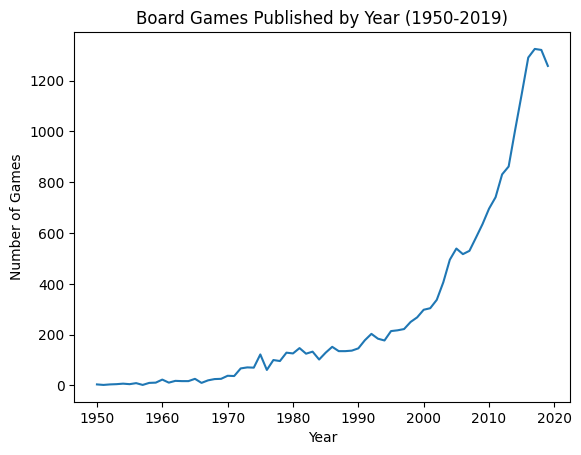

In [28]:
# Checking the distribution of board games by year to identify when the industry really bloomed
games_dist = bgg[bgg['yearpublished'].between(1950, 2019)].groupby('yearpublished')['primary'].count()
games_dist.plot(kind='line', title='Board Games Published by Year (1950-2019)', xlabel='Year', ylabel='Number of Games')

# Observing the plot, it's evident that the modern era of board games began in the 1990s.
# Therefore, we'll focus our analysis on games published from 1990 to 2019 to avoid skewing the data with older games.

#DataFrame subsetting
bgg_relevant = bgg[(bgg['yearpublished'].between(1990, 2019)) & (bgg['usersrated'] > USERSRATED_TOP)]
sum_games_year = bgg_relevant.groupby(by='yearpublished')['primary'].count()
social_games = bgg_relevant[bgg_relevant['maxplayers'] > 4].groupby('yearpublished')['primary'].count()
norm_social_games = social_games.div(sum_games_year, axis='rows')*100

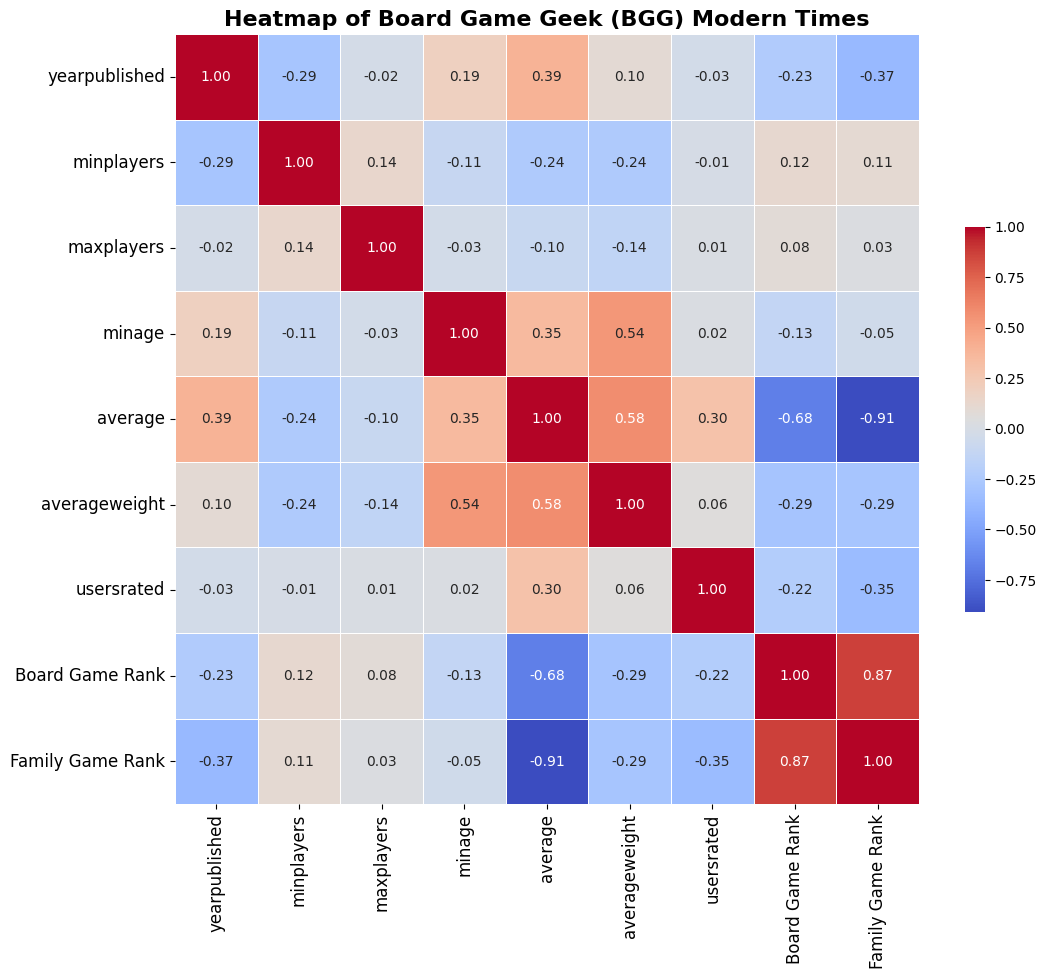

In [29]:
# Correlation matrix for games published after 1990
bgg_modern_corr = bgg_relevant[num_cols].corr()

# Heatmap of the modern games with stylized settings
plt.figure(figsize=(12, 10))
sns.heatmap(bgg_modern_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Heatmap of Board Game Geek (BGG) Modern Times', fontsize=16, fontweight = 'bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Our hottest points according to this heatmap are:

1. **Average-Year Published**: which indicates that users of BGG tend to give higher points to more recently released games.
2. **Board Game Rank-Average Weight**: which seems to indicate that the more complicated the game is, the higher it's ranked.
3. **Average-Average Weight**: similar to point 2, it seems like there's a trend where more complicated games receive higher points.

With all of this in mind, I will continue to investigate.

<Figure size 1000x600 with 0 Axes>

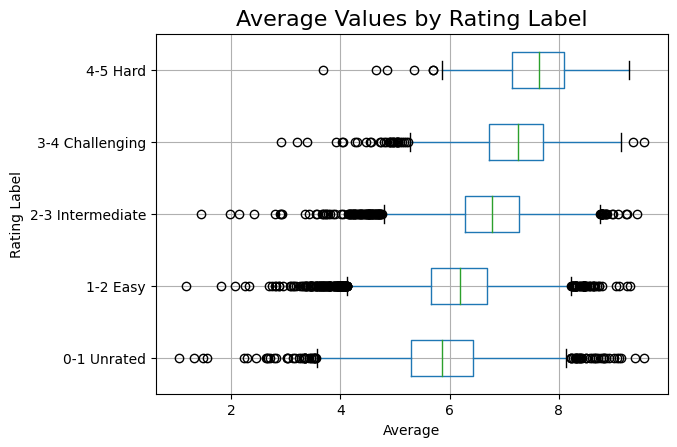

In [30]:
plt.figure(figsize=(10, 6))
bgg.boxplot(column='average', by='Rating_Label', vert=False)
plt.title('Average Values by Rating Label', fontsize=16)
plt.xlabel('Average')
plt.ylabel('Rating Label')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by Rating_Label' title
plt.show()

We can see that the harder the game, the better it's rated on average, which suggests some kind of skew of the DataFrame towards more complicated games.

To investigate whether games are receiving better ratings over the years, I can plot a scatter plot or a line plot showing the trend of average ratings over the years. This will help me visualize if there's a positive trend indicating that games are indeed getting better ratings as years progress.

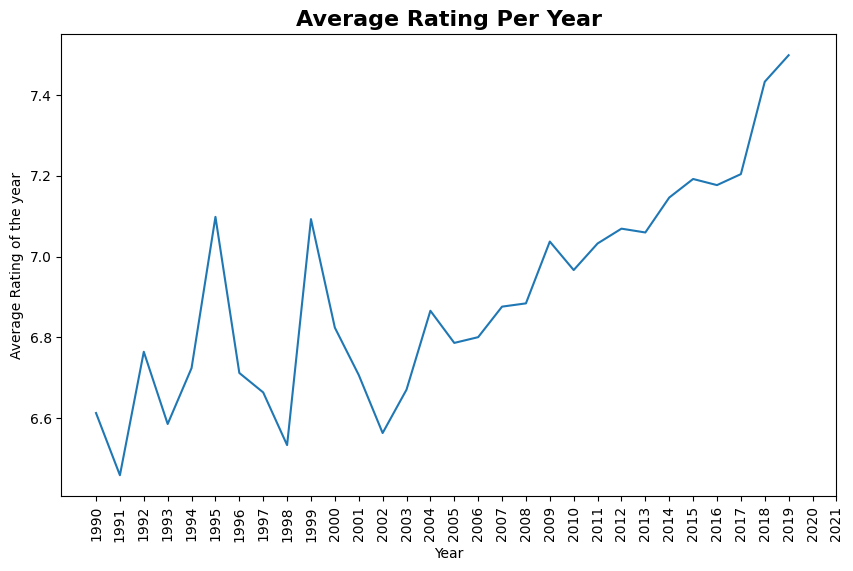

In [31]:
avg_by_year = bgg_relevant[['yearpublished','average']].groupby('yearpublished')['average'].median()
plt.figure(figsize=(10, 6)) 
avg_by_year.plot(kind='line')
plt.title('Average Rating Per Year', fontsize=16, fontweight='bold' )
plt.xlabel('Year')
plt.ylabel('Average Rating of the year')
plt.xticks(range(1990,2022,1), rotation=90)
plt.show()

## Trend Line of Average Rating Over the Years

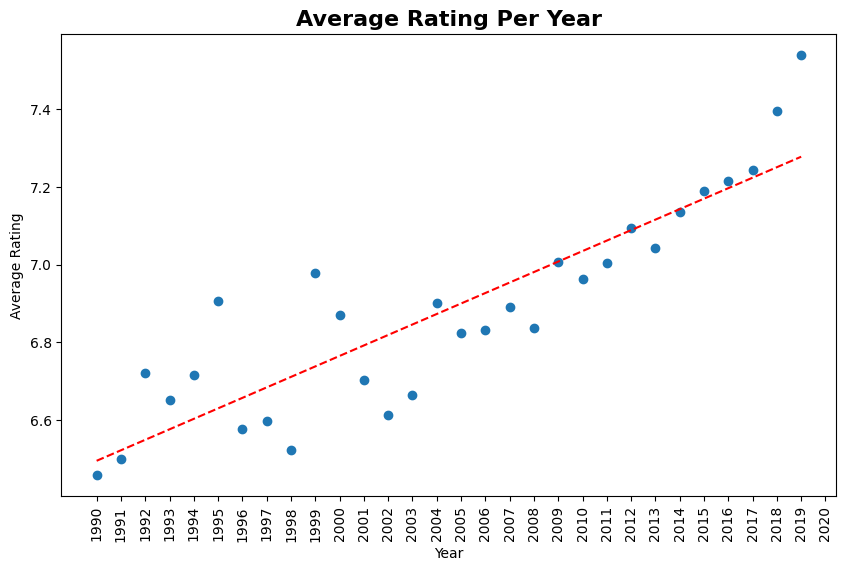

In [32]:
#???? which one should i keep?
avg_rating_by_year = bgg_relevant[['yearpublished','average']].groupby('yearpublished')['average'].mean().reset_index()
plt.figure(figsize=(10, 6))
#plt.scatter(bgg_relevant['yearpublished'],bgg_relevant['average'])
plt.scatter(avg_rating_by_year['yearpublished'], avg_rating_by_year['average'])
z = np.polyfit(avg_rating_by_year['yearpublished'], avg_rating_by_year['average'], 1)
p = np.poly1d(z)
plt.title('Average Rating Per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(range(1990,2022,1), rotation=90)
plt.plot(avg_rating_by_year['yearpublished'], p(avg_rating_by_year['yearpublished']), 'r--')
plt.show()

According to the heatmap, games are getting more complicated over the years.

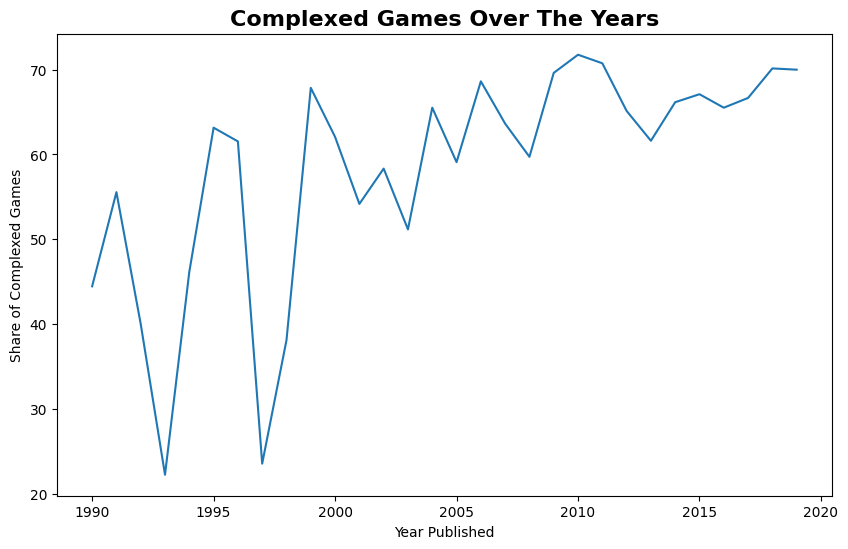

In [33]:
heavy_games_year = bgg_relevant[bgg_relevant['averageweight']>= WEIGHT_MEDIAN].groupby('yearpublished')['primary'].count()
norm_heavy_games = heavy_games_year.div(sum_games_year, axis='rows')*100
plt.figure(figsize=(10, 6)) 
norm_heavy_games.plot(kind='line',ylabel='Share of Complexed Games', xlabel='Year Published')
plt.title('Complexed Games Over The Years', fontsize=16, fontweight='bold')
plt.show()

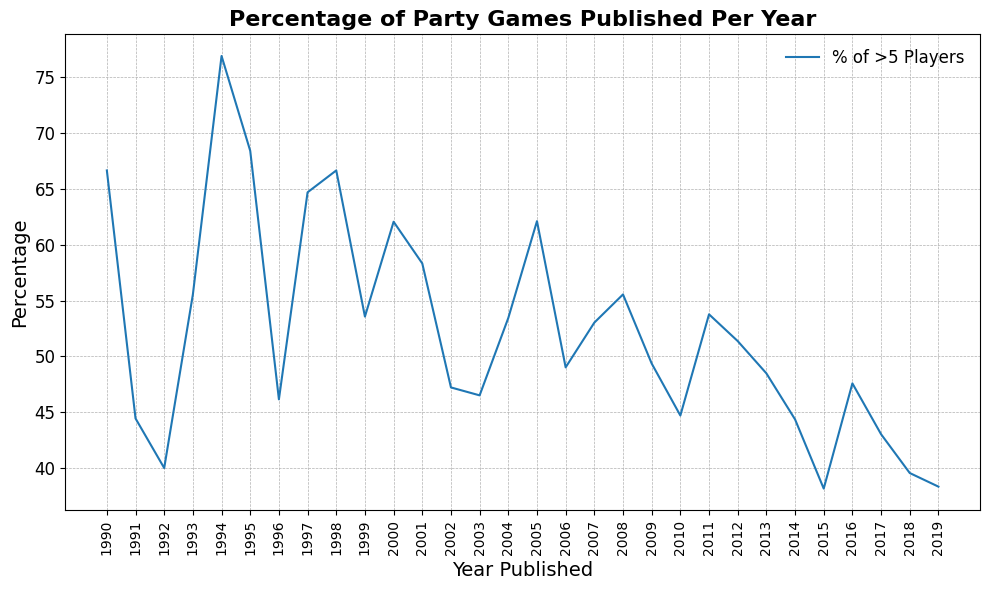

In [43]:
# Stylizing the plot for better visualization
plt.figure(figsize=(10, 6))  # Setting the figure size for better readability
norm_social_games.plot(kind='line')  # Customizing line color, width, and style
plt.title('Percentage of Party Games Published Per Year', fontsize=16, fontweight='bold')  # Setting title with custom font size and weight
plt.ylabel('Percentage', fontsize=14)  # Customizing Y-axis label with font size
plt.xlabel('Year Published', fontsize=14)  # Customizing X-axis label with font size
plt.xticks(range(1990,2020,1), rotation=90)
plt.yticks(fontsize=12)  # Customizing Y-axis ticks with font size
plt.legend(['% of >5 Players'], fontsize=12, frameon=False)  # Customizing legend with font size and removing frame
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Adding grid for better readability
plt.tight_layout()  # Adjusting subplot parameters to give specified padding
plt.show()

## In Conclusion:

1. **Improving Averages of Rating Over the Years:** According to the graph and the linear regression analysis, there is a noticeable improvement in the average ratings of games over the years.
2. **Increasing Complexity of Games:** The data and graphs indicate that even though the top 10% of total games are not becoming more complexed over the years, the top 10% games are around 70% complexed games.
3. **Stagnation in Party-Game Popularity:** Despite variations in game types, the trend for games to become more party-like (supporting more than 5 players) does not show significant growth over the years.

### Exploring Game Mechanics

Each game in our dataset features a variety of mechanics, defining how the game is played. I will deconstruct them to provide insights into which mechanics are the most popular. 

In [35]:
mech_temp = dropna_mech['boardgamemechanic']
mech_temp = mech_temp.apply(ast.literal_eval)
mech_list = [item for sublist in mech_temp for item in sublist]
mechanics = pd.Series(mech_list).value_counts()

In [36]:
mechanics.head(10)

Dice Rolling              6112
Hand Management           4421
Set Collection            2936
Variable Player Powers    2719
Hexagon Grid              2371
Simulation                2099
Card Drafting             1869
Tile Placement            1805
Modular Board             1697
Grid Movement             1635
Name: count, dtype: int64

### Visualizing Game Mechanics with Word Clouds 

Even though textual data is straightforward to read, a **word cloud** offers a more visually engaging way to identify and understand the variety of mechanics present in board games. Let's dive into the visualization to easily spot the most prominent mechanics.

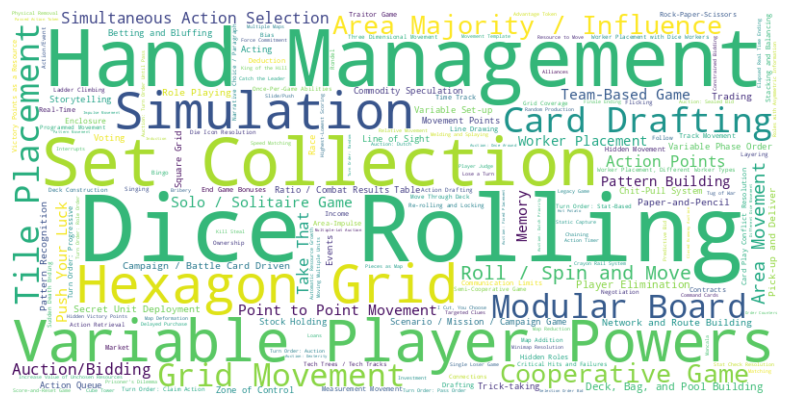

In [37]:
mech_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(mechanics)
plt.figure(figsize=(10, 5))
plt.imshow(mech_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### A Pie Chart Describing the Distribution of the Top 15 Mechanics 

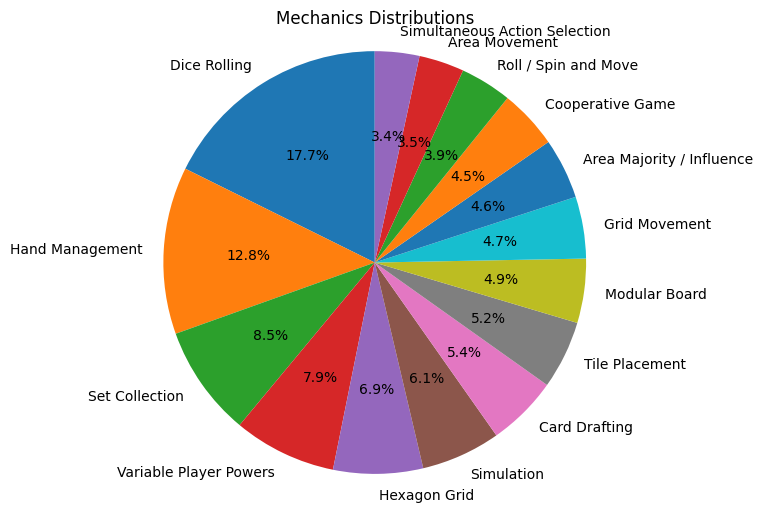

In [38]:
mechanics=mechanics.rename(None)
mechanics.head(15).plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Mechanics Distributions')
plt.axis('equal')
plt.show()

I can see that the best mechanics in games are **'Dice Rolling'**, **'Hand Management'**, **'Set Collection'**, **'Variable Player Powers'**, **'Hexagon Grid'**, **'Simulation'**, **'Card Drafting'**, **'Tile Placement'**, **'Modular Board'**, **'Grid Movement'**.

### Exploring Game Categories

Each game in our dataset features a **variety of categories**, defining the *theme* and *flow* of the game. I will **deconstruct** them to provide insights into which categories are the **most popular**.

In [39]:
dropna_cate=bgg.dropna(subset="boardgamecategory")
cate_temp=dropna_cate['boardgamecategory']
cate_temp = cate_temp.apply(ast.literal_eval)
cate_temp = [item for sublist in cate_temp for item in sublist]
categories = pd.Series(cate_temp).value_counts()

In [40]:
categories=categories.rename(None)
categories.head(10)

Card Game            6402
Wargame              3820
Fantasy              2681
Party Game           1968
Dice                 1847
Science Fiction      1666
Fighting             1658
Children's Game      1635
Abstract Strategy    1545
Economic             1503
dtype: int64

### Visualizing Game Categories with Word Clouds 

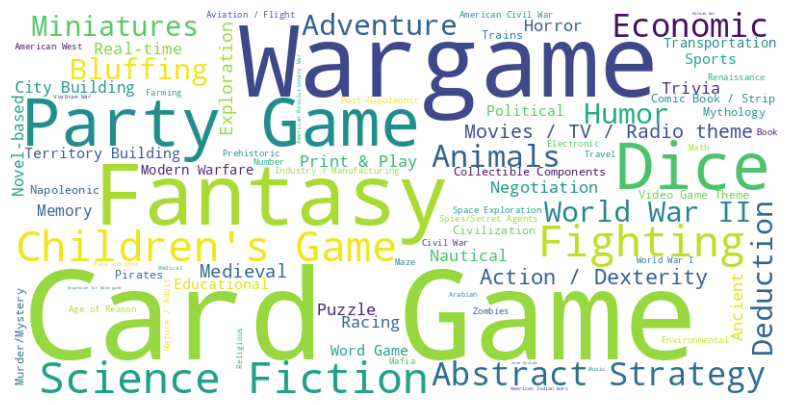

In [41]:
cate_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(categories)
plt.figure(figsize=(10, 5))
plt.imshow(cate_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

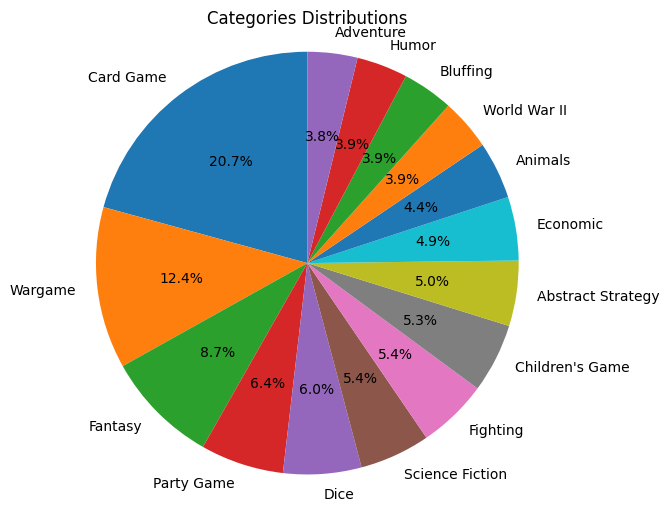

In [42]:
categories.head(15).plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Categories Distributions')
plt.axis('equal')
plt.show()

I can now see that these **'Card Game'**, **'Wargame'**, **'Fantasy'**, **'Party Game'**, **'Dice'**, **'Science Fiction'**, **'Fighting'**, **'Children's Game'**, **'Abstract Strategy'**, **'Economic'** are the biggest themes/categories in boardgames according to our DataFrame.

## Conclusion

### Part 1: Data Reliability
In the first part, I ensured the **BGG DataFrame** was reliable to work on. Abnormalities and odd values were carefully addressed, ensuring the data's integrity.

### Part 2: Custom Selection for Mr. Barman
In the second part, I subsetted the DataFrame to find board games according to **Mr. Barman's requests**. This selection is tailored for the upcoming board game night planned at his business, ensuring a diverse and engaging inventory.

### Part 3: Trends and Popularity in Board Games
Lastly, I showcased trends and elements within the board game world. This analysis aims to predict future trends and highlight the most popular elements in the current board game landscape. This insight is invaluable for understanding the evolving preferences of board game enthusiasts.